## Notes to follow when changing the Temperature Range, or Step Size


When changing the Temperature Range or Temperature Step Size, a lot of things in this file will change. When you choose to do so, remember to change the following things;
- The names of dat_file_1 and dat_file_2 need to be changed
- The temperature linspace in line 17 of Kernel 2 needs to be changed accordingly
- Be sure to also change the name in the output file in FuncAnimation, in order to keep everything clear and ordened.

Changing which quantities to plot is easy, however. Simply change the names of the quantities in 'to_analyse'. Be sure to note, put Voltage first always to neatly place it on the x-axis. If Voltage is not on the y-axis, note that in init(), the x-label is defined as "Voltage".

In [60]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
import math as m
from matplotlib.animation import FuncAnimation

def init():
    plotjeh.set_data([],[])
    ax.set_ylim([0,1])
    ax.set_xlim([-0.08,0.05])
    ax.set_xlabel("Voltage")
    ax.set_ylabel(to_analyse[1])
    return plotjeh,

def animation_func(i):
    Temp = tempsstrings[i]
    tempnum = tempsnums[i]
    Temptit = round(tempnum,1)
    ax.set_title(f"Temperature:\n{Temptit}")
    plotjeh.set_data(np.array(setT_1[Temp]),np.array(setT_2[Temp]))
    return plotjeh,

## Making one phase plane (eg v-k)

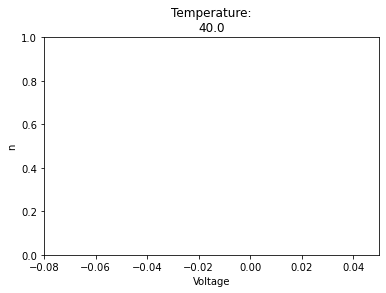

In [55]:
to_analyse = ['v','n']

cells = ['C10', 'C11A', 'C21B', 'C23', 'C31', 'C51A', 'C51B']
cells = ['C11A']

if len(to_analyse) != 2:
    print("Please, make sure to enter 2 quantities in the analyser.")
    
all_cells_scaplos = {}
for cellName in cells:
    dat_file_1 = f"{cellName}_0_20to40_step0.1_{to_analyse[0]}_nopulse.csv"
    dat_file_2 = f"{cellName}_0_20to40_step0.1_{to_analyse[1]}_nopulse.csv"
    set_1 = pd.read_csv(dat_file_1,index_col=0)
    set_2 = pd.read_csv(dat_file_2,index_col=0)
    setT_1 = pd.DataFrame.transpose(set_1)
    setT_2 = pd.DataFrame.transpose(set_2)
    tempsnums = np.linspace(20,40,201)
    tempsstrings = []
    for TT in setT_1:
        tempsstrings.append(TT)
    fig = plt.figure()
    ax = plt.axes()
    plotjeh, = ax.plot([],[],lw=2)    
    anim = FuncAnimation(fig,animation_func,frames=len(tempsnums),interval=100,init_func=init)
    anim.save(f"Animations/PhasePlaneAnimation_{cellName}_{to_analyse[0]}_against_{to_analyse[1]}.mp4",writer='ffmpeg', fps=30)

Text(0.5, 1.0, '35.0degC')

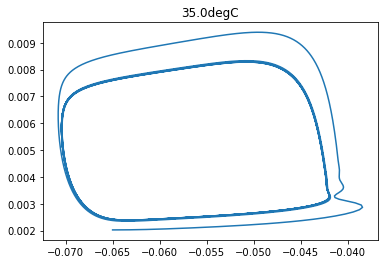

In [58]:
TTT = tempsstrings[150]
plt.plot(np.array(setT_1[TTT]),np.array(setT_2[TTT]))
plt.title(TTT)

## Making many phase planes

In [109]:
def indexing(num):
    if num == 0 or num == 1:
        print("Please enter more variables, or use the code above!")
    if num == 2:
        ploplo = (1,2)
    if num == 3:
        ploplo = (1,3)
    if num == 4:
        ploplo = (2,2)
    if num == 5:
        print("Please enter either 4 or 6 variables :)")
    if num == 6:
        ploplo = (2,3)
    if num == 7:
        print("Please enter either 6 or 8 variables :)")
    if num == 8:
        ploplo = (2,4)
    if num == 9:
        ploplo = (3,3)
    return ploplo

def find_minmax(ds):
    minmin = 99999
    maxmax = -99999
    for Tempeh in ds: #Tempeh is temperature
        tractor = ds[Tempeh] #tractor is trace
        thismin = min(tractor)
        thismax = max(tractor)
        if thismin < minmin:
            minmin = thismin
        if thismax > maxmax:
            maxmax = thismax
    return minmin,maxmax
        

def init():
    minv,maxv = find_minmax(setT_1)
    for ind,ax in enumerate(axes.flatten()):
        pp = planes[ind]
        minp,maxp = find_minmax(vartraces[pp])
        ax.set_xlim([(m.floor((minv*1000)/5)*5)/1000,(m.ceil((maxv*1000)/5)*5)/1000])
        if maxp - minp >= 0.5:
            ax.set_ylim([0,1])
        else:
            ax.set_ylim([minp,maxp])
        ax.set_xlabel("Voltage")
        ax.set_ylabel(pp)
    return plotjehs,

def animation_func2(i):
    Temp = tempsstrings[i]
    tempnum = tempsnums[i]
    Temptit = round(tempnum,1)
    fig.suptitle(f"Temperature:\n{Temptit} degC",va='top')
    fig.tight_layout()
    for indexi,plotjeh in enumerate(plotjehs):
        varvar = planes[indexi]
        plotjeh.set_data(np.array(setT_1[Temp]),np.array(vartraces[varvar][Temp]))
    return plotjehs,

Printing: C11A


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


Printing: C21B


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


Printing: C23


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


Printing: C31


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


Printing: C51A


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


Printing: C51B


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


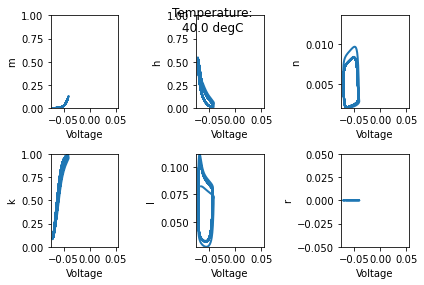

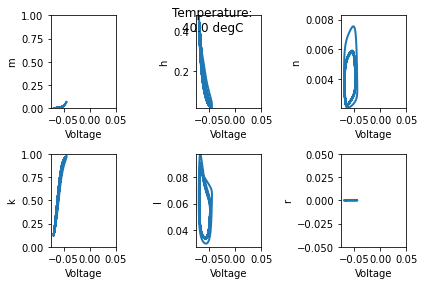

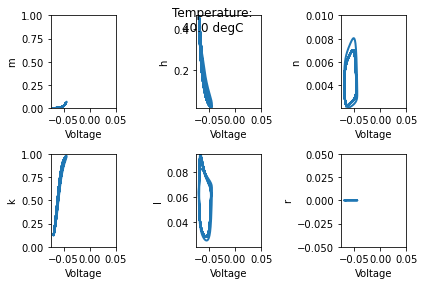

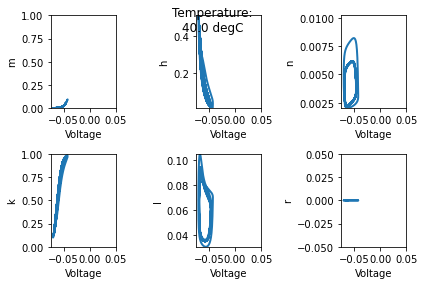

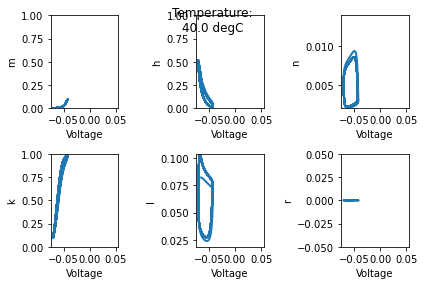

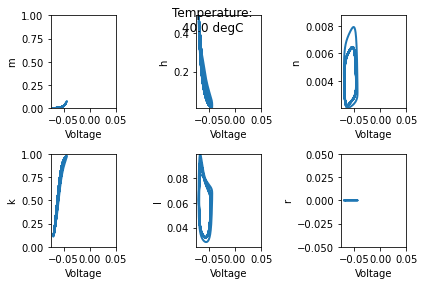

In [112]:
planes = ['m','h','n','k','l','r']

cells = ['C11A', 'C21B', 'C23', 'C31', 'C51A', 'C51B']
#cells = ['C11A']

for cellName in cells:
    print(f"Printing: {cellName}")
    dat_file_1 = f"{cellName}_0_20to40_step0.1_v_nopulse.csv"
    set_1 = pd.read_csv(dat_file_1,index_col=0)
    setT_1 = pd.DataFrame.transpose(set_1)
    vartraces = {}
    for var in planes:
        dat_file_2 = f"{cellName}_0_20to40_step0.1_{var}_nopulse.csv"
        set_2 = pd.read_csv(dat_file_2,index_col=0)
        setT_2 = pd.DataFrame.transpose(set_2)
        vartraces[var] = setT_2
    tempsnums = np.linspace(20,40,201)
    tempsstrings = []
    for TT in setT_1:
        tempsstrings.append(TT)
    ploplo = indexing(len(planes))
    # print(ploplo)
    fig, axes = plt.subplots(ploplo[0],ploplo[1])
    plotjehs = []
    for ind,ax in enumerate(axes.flatten()):
        plotjeh, = ax.plot([],[],lw=2)
        plotjehs.append(plotjeh,)
    anim = FuncAnimation(fig,animation_func2,frames=len(tempsnums),interval=100,init_func=init)
    anim.save(f"Animations/PhasePlaneAnimation_{cellName}_all_vars.mp4",writer='ffmpeg', fps=30)